<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.248764,-193.549248,-150.300484,75.034210,-225.334695
1,0.0,1.0,25.609054,37.096812,72.705867,103.498149,-30.792282
2,0.0,2.0,29.758313,42.578978,82.337291,88.038891,-5.701600
3,0.0,3.0,59.499110,732.855719,802.354829,-22.769012,825.123841
4,0.0,4.0,21.654404,20.067093,51.721497,118.232338,-66.510841
...,...,...,...,...,...,...,...
19995,999.0,15.0,49.449375,-412.264447,-352.815072,-13.608575,-339.206497
19996,999.0,16.0,91.858725,146.940172,248.798896,107.682239,141.116657
19997,999.0,17.0,84.201480,-58.329468,35.872011,85.782505,-49.910494
19998,999.0,18.0,88.421270,1235.612633,1334.033903,97.851114,1236.182790


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.248764,-193.549248,-150.300484,75.034210,-225.334695
1,0.0,1.0,25.609054,37.096812,72.705867,103.498149,-30.792282
2,0.0,2.0,29.758313,42.578978,82.337291,88.038891,-5.701600
3,0.0,3.0,59.499110,732.855719,802.354829,-22.769012,825.123841
4,0.0,4.0,21.654404,20.067093,51.721497,118.232338,-66.510841
...,...,...,...,...,...,...,...
19995,999.0,15.0,49.449375,-412.264447,-352.815072,-13.608575,-339.206497
19996,999.0,16.0,91.858725,146.940172,248.798896,107.682239,141.116657
19997,999.0,17.0,84.201480,-58.329468,35.872011,85.782505,-49.910494
19998,999.0,18.0,88.421270,1235.612633,1334.033903,97.851114,1236.182790


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    33.248764  -193.549248  -150.300484   75.034210  -225.334695
      1.0    25.609054    37.096812    72.705867  103.498149   -30.792282
      2.0    29.758313    42.578978    82.337291   88.038891    -5.701600
      3.0    59.499110   732.855719   802.354829  -22.769012   825.123841
      4.0    21.654404    20.067093    51.721497  118.232338   -66.510841
...                ...          ...          ...         ...          ...
999.0 15.0   49.449375  -412.264447  -352.815072  -13.608575  -339.206497
      16.0   91.858725   146.940172   248.798896  107.682239   141.116657
      17.0   84.201480   -58.329468    35.872011   85.782505   -49.910494
      18.0   88.421270  1235.612633  1334.033903   97.851114  1236.182790
      19.0   55.526315   -98.988778   -33.462463    3.771484   -37.233947

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    33.248764  -193.549248  -150.300484   75.034210  -225.334695
      1.0    25.609054    37.096812    72.705867  103.498149   -30.792282
      2.0    29.758313    42.578978    82.337291   88.038891    -5.701600
      3.0    59.499110   732.855719   802.354829  -22.769012   825.123841
      4.0    21.654404    20.067093    51.721497  118.232338   -66.510841
...                ...          ...          ...         ...          ...
999.0 15.0   49.449375  -412.264447  -352.815072  -13.608575  -339.206497
      16.0   91.858725   146.940172   248.798896  107.682239   141.116657
      17.0   84.201480   -58.329468    35.872011   85.782505   -49.910494
      18.0   88.421270  1235.612633  1334.033903   97.851114  1236.182790
      19.0   55.526315   -98.988778   -33.462463    3.771484   -37.233947

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.248764,-193.549248,-150.300484,75.034210,-225.334695
1,0.0,1.0,25.609054,37.096812,72.705867,103.498149,-30.792282
2,0.0,2.0,29.758313,42.578978,82.337291,88.038891,-5.701600
3,0.0,3.0,59.499110,732.855719,802.354829,-22.769012,825.123841
4,0.0,4.0,21.654404,20.067093,51.721497,118.232338,-66.510841
...,...,...,...,...,...,...,...
19995,999.0,15.0,49.449375,-412.264447,-352.815072,-13.608575,-339.206497
19996,999.0,16.0,91.858725,146.940172,248.798896,107.682239,141.116657
19997,999.0,17.0,84.201480,-58.329468,35.872011,85.782505,-49.910494
19998,999.0,18.0,88.421270,1235.612633,1334.033903,97.851114,1236.182790


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    33.248764  -193.549248  -150.300484   75.034210  -225.334695
      1.0    25.609054    37.096812    72.705867  103.498149   -30.792282
      2.0    29.758313    42.578978    82.337291   88.038891    -5.701600
      3.0    59.499110   732.855719   802.354829  -22.769012   825.123841
      4.0    21.654404    20.067093    51.721497  118.232338   -66.510841
...                ...          ...          ...         ...          ...
999.0 15.0   49.449375  -412.264447  -352.815072  -13.608575  -339.206497
      16.0   91.858725   146.940172   248.798896  107.682239   141.116657
      17.0   84.201480   -58.329468    35.872011   85.782505   -49.910494
      18.0   88.421270  1235.612633  1334.033903   97.851114  1236.182790
      19.0   55.526315   -98.988778   -33.462463    3.771484   -37.233947

[20000 rows x 5 columns]

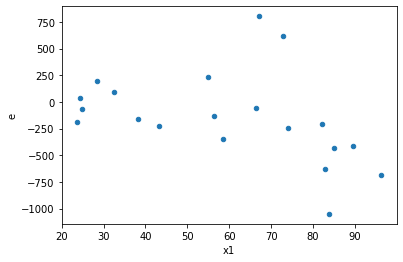

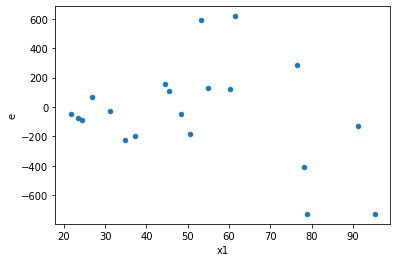

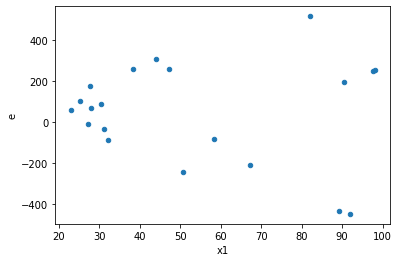

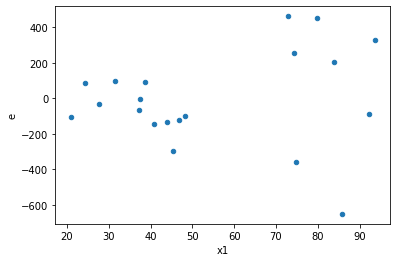

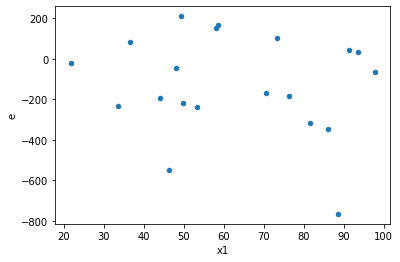

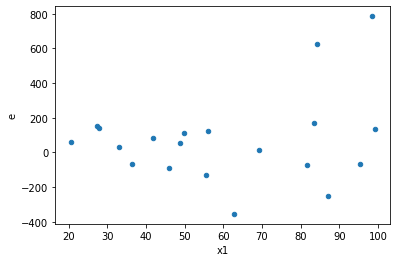

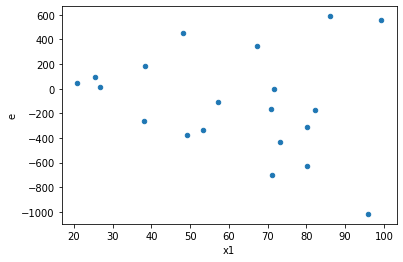

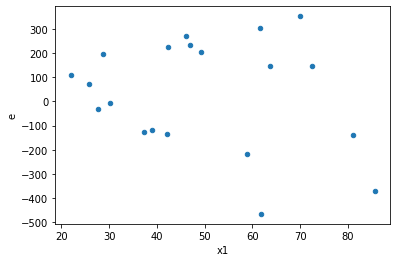

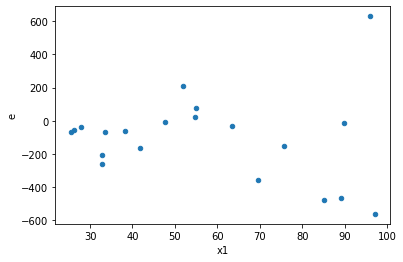

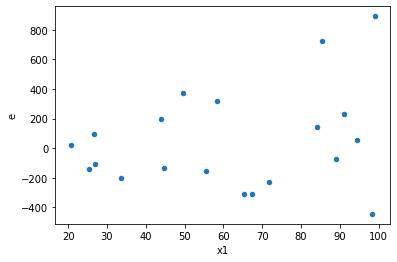

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,7.0,7.0,134071.78208205933,657783.4032413164,19153.111726008476,93969.05760590234,4.906203177330161,0.052387663609272606,0.9738061681953637,0.026193831804636303,Reject005=1 : Homoscedasticity
9.0,7.0,7.0,262446.47481351777,1100052.560755911,37492.35354478825,157150.36582227302,4.191531098055545,0.07811047864996157,0.9609447606750192,0.039055239324980784,Reject005=1 : Homoscedasticity
12.0,7.0,7.0,37427.957866146084,839319.9314442073,5346.851123735155,119902.84734917247,22.424945930683,0.0005503705188276697,0.9997248147405862,0.00027518525941383487,Reject005=0 : Heteroscedasticity
13.0,7.0,7.0,62187.329748509066,1119114.6960583513,8883.904249787009,159873.5280083359,17.995863475472383,0.0011233675101676166,0.9994383162449162,0.0005616837550838083,Reject005=0 : Heteroscedasticity
15.0,7.0,7.0,40415.344872311034,824982.2917520805,5773.620696044433,117854.61310744008,20.41260056937642,0.0007476314677379303,0.999626184266131,0.00037381573386896516,Reject005=0 : Heteroscedasticity
19.0,7.0,7.0,208405.24515892647,1375376.3536980082,29772.177879846637,196482.3362425726,6.599528493868609,0.023534965472190805,0.9882325172639046,0.011767482736095403,Reject005=0 : Heteroscedasticity
21.0,7.0,7.0,421122.61094926624,628558.8722534543,60160.372992752316,89794.12460763633,1.4925792534307272,0.610287927573427,0.6948560362132865,0.3051439637867135,Reject005=1 : Homoscedasticity
22.0,7.0,7.0,57802.13773840011,1893715.087160464,8257.448248342873,270530.72673720913,32.76202509552512,0.0001571668998510134,0.9999214165500745,7.85834499255067e-05,Reject005=0 : Heteroscedasticity
23.0,7.0,7.0,138423.6484381388,1922412.1836298157,19774.806919734114,274630.3119471165,13.88788841589403,0.002559164584960305,0.9987204177075198,0.0012795822924801525,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,2882750.6697695074,381314.5297412661,411821.52425278677,54473.5042487523,0.13227454380290005,0.01601315172998852,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,1616321.2681697095,178990.15067851814,230903.0383099585,25570.02152550259,0.11073921639427728,0.009532774062825485,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,2099386.9220573907,128409.22436064041,299912.4174367701,18344.174908662917,0.06116510635152471,0.0015274214034307876,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,1159509.4024743093,214361.7116733988,165644.20035347276,30623.101667628398,0.1848727670650763,0.0405219603391486,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,2953260.1689341487,91131.64209919391,421894.3098477355,13018.80601417056,0.03085797961785532,0.0001629968124816381,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,252034.0126440068,223100.44470578377,36004.85894914383,31871.492100826254,0.8851997488962287,0.8763273498629495,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,134071.78208205933,657783.4032413164,19153.111726008476,93969.05760590234,4.906203177330161,0.052387663609272606,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,469242.8746409441,64201.88044846601,67034.69637727774,9171.697206923714,0.13682014990124694,0.017639596573111184,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,1734322.539166539,207395.5152907429,247760.362738077,29627.930755820413,0.11958301331331983,0.011952846579084103,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    689
Reject005=1 : Homoscedasticity      311
Name: Result_test, dtype: int64